In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [ ]:
from citipy import city

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

592

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

> **HINT:** The OpenWeatherMap API only allows 60 calls per minute under their free plan. Try using `time.sleep(60)` after each set of 50 cities to avoid API errors due to large calls.

In [6]:
city_test = cities
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

cities1 = []
temp = []
humidity = []
clouds = []
windspeed = []
lats = []

for city in city_test:
    query_url = f"{url}appid={weather_api_key}&units={units}&q={city}"
    try:
        url_city=(query_url).replace(" ","+")
        response=requests.get(url_city).json()
        cities1.append(response["name"])
        temp.append(response['main']["temp"])
        humidity.append(response['main']["humidity"])
        clouds.append(response["clouds"]["all"])
        windspeed.append(response['wind']["speed"])
        lats.append(response["coord"]["lat"])
        print(f'Processing number {(city_test.index(city)+1)}, which is {city}')
    except:
        print(f'Processing number {(city_test.index(city)+1)}, which is {city} and has no information')

Processing number 1, which is barrow
Processing number 2, which is carnarvon
Processing number 3, which is barahona
Processing number 4, which is yellowknife
Processing number 5, which is longyearbyen
Processing number 6, which is maniitsoq
Processing number 7, which is beringovskiy
Processing number 8, which is hobart
Processing number 9, which is upernavik
Processing number 10, which is rikitea
Processing number 11, which is tongzi
Processing number 12, which is east london
Processing number 13, which is asyut
Processing number 14, which is asau
Processing number 15, which is castro
Processing number 16, which is sao filipe
Processing number 17, which is cape town
Processing number 18, which is yirol and has no information
Processing number 19, which is san patricio
Processing number 20, which is vaini
Processing number 21, which is tsihombe and has no information
Processing number 22, which is kaeo
Processing number 23, which is urumqi
Processing number 24, which is lompoc
Processin

Processing number 192, which is penzance
Processing number 193, which is alice springs
Processing number 194, which is san vicente
Processing number 195, which is kalmunai
Processing number 196, which is chapais
Processing number 197, which is saint-pierre
Processing number 198, which is inhambane
Processing number 199, which is ramsar
Processing number 200, which is kassala
Processing number 201, which is tasiilaq
Processing number 202, which is vila franca do campo
Processing number 203, which is killybegs
Processing number 204, which is olkhovka
Processing number 205, which is obihiro
Processing number 206, which is ko samui
Processing number 207, which is jacareacanga
Processing number 208, which is grindavik
Processing number 209, which is dukat
Processing number 210, which is chuy
Processing number 211, which is nemuro
Processing number 212, which is alofi
Processing number 213, which is pisco
Processing number 214, which is san carlos del zulia
Processing number 215, which is ha

Processing number 378, which is namibe
Processing number 379, which is bosaso
Processing number 380, which is bom jesus
Processing number 381, which is kita
Processing number 382, which is buariki and has no information
Processing number 383, which is satana
Processing number 384, which is margate
Processing number 385, which is souillac
Processing number 386, which is vetapalem
Processing number 387, which is kavaratti
Processing number 388, which is cururupu
Processing number 389, which is athabasca
Processing number 390, which is dekar
Processing number 391, which is lake cowichan
Processing number 392, which is vao
Processing number 393, which is belmonte
Processing number 394, which is hohhot
Processing number 395, which is plouzane
Processing number 396, which is jaragua
Processing number 397, which is waddan
Processing number 398, which is bani walid
Processing number 399, which is omboue
Processing number 400, which is klaksvik
Processing number 401, which is kazalinsk and has 

Processing number 564, which is tambovka
Processing number 565, which is espinho
Processing number 566, which is riyadh
Processing number 567, which is comodoro rivadavia
Processing number 568, which is sorokino
Processing number 569, which is klyuchi
Processing number 570, which is maceio
Processing number 571, which is lasa
Processing number 572, which is oranjemund
Processing number 573, which is nidzica
Processing number 574, which is tateyama
Processing number 575, which is alakurtti
Processing number 576, which is manono
Processing number 577, which is alamos
Processing number 578, which is kapit
Processing number 579, which is develi
Processing number 580, which is salalah
Processing number 581, which is kindu
Processing number 582, which is atar
Processing number 583, which is arona
Processing number 584, which is saint george
Processing number 585, which is san jose
Processing number 586, which is sisimiut
Processing number 587, which is gladstone
Processing number 588, which 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [15]:
cities_df = pd.DataFrame({"City": cities1,
                        "Temperature": temp,
                        "Humidity": humidity,
                        "Clouds" : clouds,
                        "Windspeed": windspeed,
                        "Latitude": lats
                         })
cities_df.to_csv("CitiesDF.csv", index=False)
cities_df.head()

,City,Temperature,Humidity,Clouds,Windspeed,Latitude
0,Barrow,-28.99,76,0,3.60,71.2906
1,Carnarvon,27.04,74,81,5.66,-24.8667
2,Santa Cruz de Barahona,28.90,65,20,3.09,18.2085
3,Yellowknife,-38.99,77,20,2.06,62.4560
4,Longyearbyen,-6.09,68,20,7.72,78.2186


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [21]:
#  Get the indices of cities that have humidity over 100%.
over_hundred = cities_df[cities_df.Humidity > 100]
over_hundred
#no humidity over 100

,City,Temperature,Humidity,Clouds,Windspeed,Latitude


In [28]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
humidity_df = cities_df['Humidity']

qs = humidity_df.quantile([.25,.5,.75])
lower = qs[.25]
upper = qs[.75]
interquartile = upper-lower
lowerbnd = lower - (1.5*interquartile)
upperbnd = upper + (1.5*interquartile)

clean_city_data = cities_df.drop(cities_df.index[(cities_df['Humidity'] < lowerbnd) | (cities_df['Humidity'] > upperbnd)])
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data.count()
cities_df.count()
#12 outliers dropped

City           529
Temperature    529
Humidity       529
Clouds         529
Windspeed      529
Latitude       529
dtype: int64

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

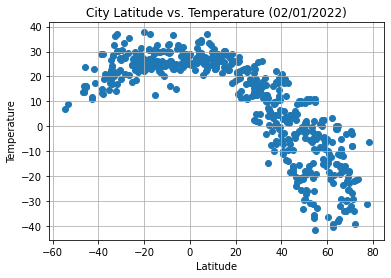

In [34]:
x_values = clean_city_data.Latitude

y_values = clean_city_data.Temperature

plt.scatter(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title('City Latitude vs. Temperature (02/01/2022)')
plt.grid()
plt.show()
#plt.savefig("../output_data/lattemp.png")

## Latitude vs. Humidity Plot

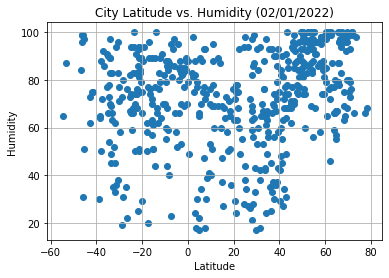

In [35]:
x_values = clean_city_data.Latitude

y_values = clean_city_data.Humidity 

plt.scatter(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('City Latitude vs. Humidity (02/01/2022)')
plt.grid()
plt.show()

## Latitude vs. Cloudiness Plot

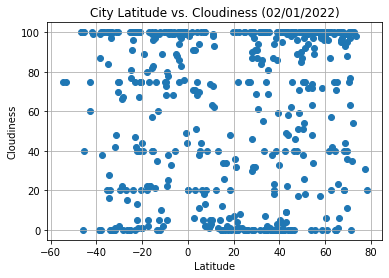

In [36]:
x_values = clean_city_data.Latitude

y_values = clean_city_data.Clouds

plt.scatter(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('City Latitude vs. Cloudiness (02/01/2022)')
plt.grid()
plt.show()

## Latitude vs. Wind Speed Plot

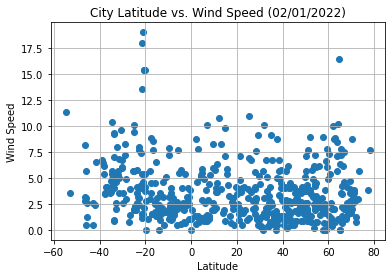

In [37]:
x_values = clean_city_data.Latitude

y_values = clean_city_data.Windspeed

plt.scatter(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('City Latitude vs. Wind Speed (02/01/2022)')
plt.grid()
plt.show()

## Linear Regression

In [63]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

-0.8449293261250739


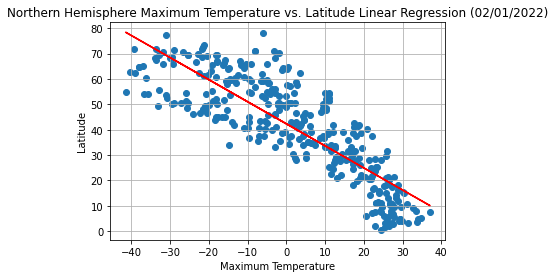

In [64]:
nhem = clean_city_data.drop(clean_city_data.index[clean_city_data['Latitude']<0])

x_values = nhem.Temperature
y_values = nhem.Latitude

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Maximum Temperature')
plt.ylabel('Latitude')
plt.title("Northern Hemisphere Maximum Temperature vs. Latitude Linear Regression (02/01/2022)")
print(rvalue)
plt.grid()
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

ValueError: x and y must have same first dimension, but have shapes (176,) and (341,)

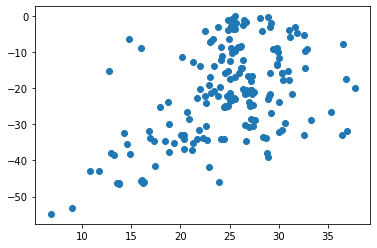

In [74]:
shem = clean_city_data.drop(clean_city_data.index[clean_city_data.Latitude>0])

x_values = shem.Temperature
y_values = shem.Latitude

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Maximum Temperature')
plt.ylabel('Latitude')
plt.title("Southern Hemisphere Maximum Temperature vs. Latitude Linear Regression (02/01/2022)")
print(rvalue)
plt.grid()
plt.show()


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

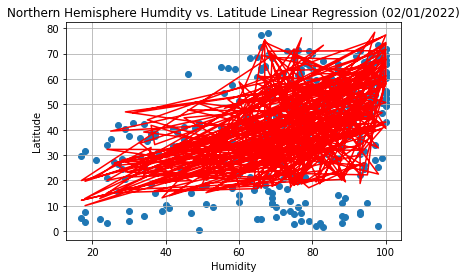

In [78]:
x_values = nhem.Humidity 
y_values = nhem.Latitude

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Humidity')
plt.ylabel('Latitude')
plt.title("Northern Hemisphere Humdity vs. Latitude Linear Regression (02/01/2022)")
print(rvalue)
plt.grid()
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

ValueError: x and y must have same first dimension, but have shapes (176,) and (341,)

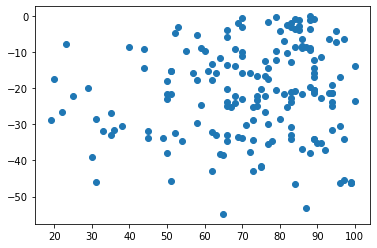

In [75]:
x_values = shem.Humidity 
y_values = shem.Latitude

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Humidity')
plt.ylabel('Latitude')
plt.title("Southern Hemisphere Humdity vs. Latitude Linear Regression (02/01/2022)")
print(rvalue)
plt.grid()
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

-0.8449293261250739


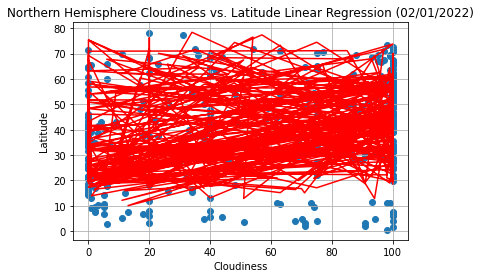

In [66]:
x_values = nhem.Clouds 
y_values = nhem.Latitude

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Cloudiness')
plt.ylabel('Latitude')
plt.title("Northern Hemisphere Cloudiness vs. Latitude Linear Regression (02/01/2022)")
print(rvalue)
plt.grid()
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

ValueError: x and y must have same first dimension, but have shapes (176,) and (341,)

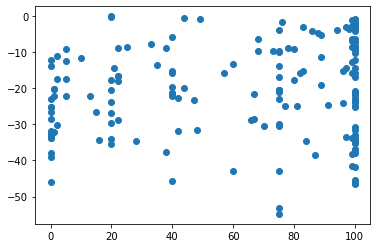

In [76]:
x_values = shem.Clouds 
y_values = shem.Latitude

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Cloudiness')
plt.ylabel('Latitude')
plt.title("Southern Hemisphere Cloudiness vs. Latitude Linear Regression (02/01/2022)")
print(rvalue)
plt.grid()
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

-0.8449293261250739


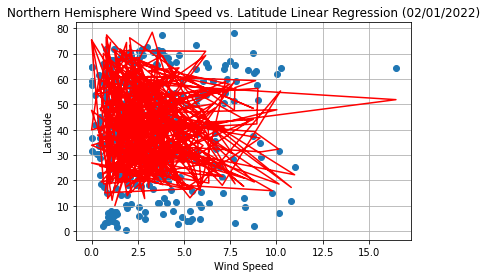

In [67]:
x_values = nhem.Windspeed 
y_values = nhem.Latitude

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Wind Speed')
plt.ylabel('Latitude')
plt.title("Northern Hemisphere Wind Speed vs. Latitude Linear Regression (02/01/2022)")
print(rvalue)
plt.grid()
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

ValueError: x and y must have same first dimension, but have shapes (176,) and (341,)

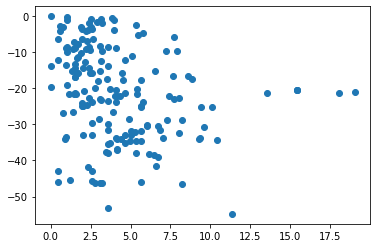

In [77]:
x_values = shem.Windspeed 
y_values = shem.Latitude

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Wind Speed')
plt.ylabel('Latitude')
plt.title("Southern Hemisphere Wind Speed vs. Latitude Linear Regression (02/01/2022)")
print(rvalue)
plt.grid()
plt.show()